Clasificación
---------------

El objetivo de esta práctica es predecir si los ingresos de una persona superan o no los 50.000$ (variable income)

Archivos: `census_train.csv`, `census_test.csv`

Este conjunto de datos es una versión modificada del utilizado en el artículo ["Scaling Up the Accuracy of Naive-Bayes Classifiers: a Decision-Tree Hybrid](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf) escrito por Ron Kohavi. Los datos originales se pueden encontrar en el [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income)

Para ello, se tienen 13 características:


| Variable | Descripción  | Valores |  
|-----|-------|-------|
| **age** | Edad  |    númerico   |
| **workclass** | tipo de ocupación |Private, Self-emp-not-inc, Self-emp-inc, Federal-gov,Local-gov, State-gov, Without-pay, Never-worked|
| **education_level** | Nivel educativo  | Bachelors, Some-college, 11th, HS-grad,Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool      |
| **education-num** | Número de años de educación completados.  |    númerico   |
| **marital-status** | estadocivil | Married-civ-spouse,Divorced,Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse      |
| **occupation** | ocupación   |   Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces    |
| **relationship** | familia  |   Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried    |
| **race** | raza  |  White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black     |
| **sex** | Género   |   Female, Male    |
| **capital-gain** |  Ganancia de capitales |   númerico    |
| **capital-loss** | Pérdida de capitales  |  númerico     |
| **hours-per-week** |  Promedio de horas trabajadas por semana |   númerico    |
| **native-country** | País de origen  |   United-States,Cambodia,England,Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinidad&Tobago, Peru, Hong, Holand-Netherlands    |
|       |
|**income**  | Ingresos  | númerico  |




# Carga de Librerias y Funciones auxiliares
Primero cargamos las librerías con las que vamos a trabajar y las funciones auxiliares que necesitemos.

In [148]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing

In [149]:
def plot_confusion_matrix(confmat):
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.5)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')

    plt.tight_layout()
    plt.show()

# Carga y transformaciones de datos

In [150]:
data = pd.read_csv('./data/census_train.csv',sep=',', decimal='.')
data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,49,Private,Masters,14.0,Divorced,Sales,Unmarried,Other,Female,0.0,0.0,20.0,Peru,<=50K
1,43,Private,Assoc-acdm,12.0,Divorced,Craft-repair,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
2,53,Private,Doctorate,16.0,Married-civ-spouse,Prof-specialty,Wife,White,Female,99999.0,0.0,37.0,United-States,>50K
3,23,Private,HS-grad,9.0,Married-civ-spouse,Adm-clerical,Wife,White,Female,3908.0,0.0,40.0,United-States,<=50K
4,32,Private,Some-college,10.0,Divorced,Handlers-cleaners,Unmarried,Black,Male,0.0,0.0,40.0,Nicaragua,<=50K


Codificamos las distintas variables para darnos opciones distintas a la hora de elegir el algoritmo del modelo

In [151]:
data.isnull().any()

age                False
workclass          False
education_level    False
education-num      False
marital-status     False
occupation         False
relationship       False
race               False
sex                False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country     False
income             False
dtype: bool

In [152]:
data.dtypes

age                  int64
workclass           object
education_level     object
education-num      float64
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country      object
income              object
dtype: object

In [153]:
# codificacion de variables

wrk_LE = preprocessing.LabelEncoder() # para Workclass
edu_LE = preprocessing.LabelEncoder() # para Education Level
mar_LE = preprocessing.LabelEncoder() # Marital Status
ocu_LE = preprocessing.LabelEncoder() # Occupation
rel_LE = preprocessing.LabelEncoder() # Relationship
rac_LE = preprocessing.LabelEncoder() # Race
sex_LE = preprocessing.LabelEncoder() # Sex
nat_LE = preprocessing.LabelEncoder() # Native Country
inc_LE = preprocessing.LabelEncoder() # income

wrk_LE.fit(data['workclass'])
edu_LE.fit(data['education_level'])
mar_LE.fit(data['marital-status'])
ocu_LE.fit(data['occupation'])
rel_LE.fit(data['relationship'])
rac_LE.fit(data['race'])
sex_LE.fit(data['sex'])
nat_LE.fit(data['native-country'])
inc_LE.fit(data['income'])

data['workclass']       = wrk_LE.transform(data['workclass'])
data['education_level'] = edu_LE.transform(data['education_level'])
data['marital-status']  = mar_LE.transform(data['marital-status'])
data['occupation']      = ocu_LE.transform(data['occupation'])
data['relationship']    = rel_LE.transform(data['relationship'])
data['race']            = rac_LE.transform(data['race'])
data['sex']             = sex_LE.transform(data['sex'])
data['native-country']  = nat_LE.transform(data['native-country'])
data['income']          = inc_LE.transform(data['income'])

In [154]:

#Las variables Float las convertimos a enteros
float_col = data.select_dtypes(include = ['float64']) # Selecciona las columnas Float
for col in float_col.columns.values:
    data[col] = data[col].astype('int64')       # Transforma

In [155]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,36177.0,38.598751,13.229011,17.0,28.0,37.0,47.0,90.0
workclass,36177.0,2.205877,0.963834,0.0,2.0,2.0,2.0,6.0
education_level,36177.0,10.314786,3.824565,0.0,9.0,11.0,12.0,15.0
education-num,36177.0,10.113663,2.553911,1.0,9.0,10.0,13.0,16.0
marital-status,36177.0,2.579678,1.498088,0.0,2.0,2.0,4.0,6.0
occupation,36177.0,5.964701,4.026909,0.0,2.0,6.0,9.0,13.0
relationship,36177.0,1.408519,1.596411,0.0,0.0,1.0,3.0,5.0
race,36177.0,3.681842,0.830472,0.0,4.0,4.0,4.0,4.0
sex,36177.0,0.677088,0.467596,0.0,0.0,1.0,1.0,1.0
capital-gain,36177.0,1088.861735,7506.099972,0.0,0.0,0.0,0.0,99999.0


In [156]:
data.head(10)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,49,2,12,14,0,11,4,3,0,0,0,20,28,0
1,43,2,7,12,0,2,1,4,1,0,0,40,38,0
2,53,2,10,16,2,9,5,4,0,99999,0,37,38,1
3,23,2,11,9,2,0,5,4,0,3908,0,40,38,0
4,32,2,15,10,0,5,4,2,1,0,0,40,26,0
5,29,0,15,10,3,0,3,4,0,0,0,40,38,0
6,51,2,15,10,4,0,3,4,0,0,0,40,38,0
7,33,3,11,9,2,3,0,4,1,0,0,50,38,0
8,35,1,12,14,2,9,0,4,1,0,0,40,38,0
9,39,2,15,10,2,11,0,4,1,0,0,40,38,0


In [157]:
#que hago con los desconocidos


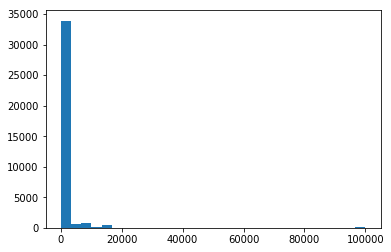

In [158]:
plt.hist(data['capital-gain'], bins=30)
plt.show()

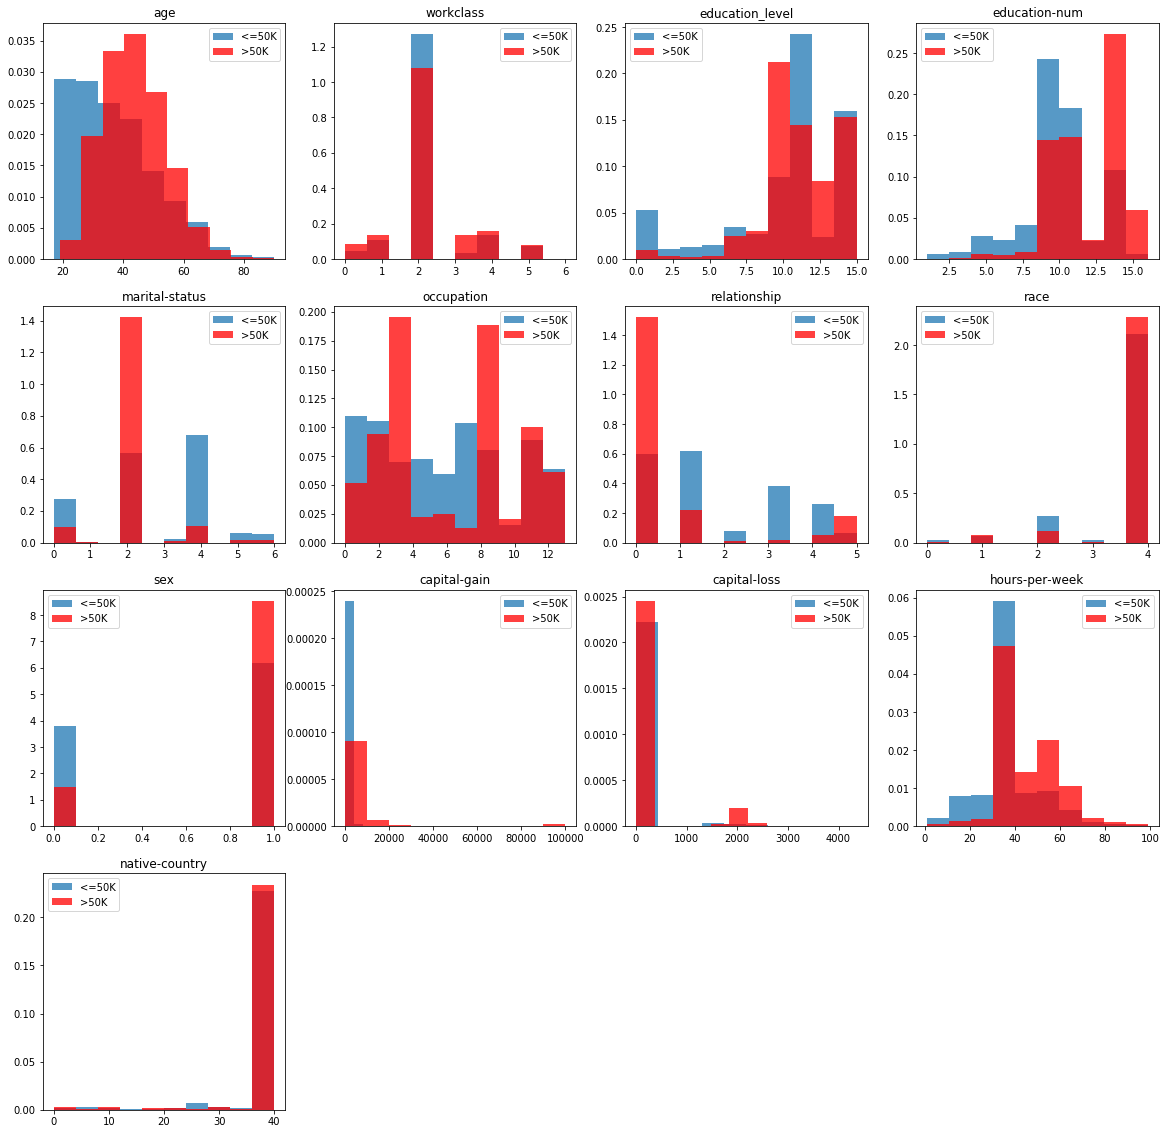

In [159]:
# Pintamos histogramas para cada clase
plt.figure(figsize=(20,20))

idx_0 =  data['income'] == 0
idx_1 =  data['income'] == 1
variables_histo = ['age', 'education-num']

for i,feature in enumerate(data.columns.drop(['income'])):
    plt.subplot(4,4,i+1)   
    plt.hist(data.ix[idx_0,feature],density=1, alpha=0.75,label='<=50K')
    plt.hist(data.ix[idx_1,feature],density=1, facecolor='red', alpha=0.75,label='>50K')
    plt.legend()
    plt.title(feature)
    
plt.show()

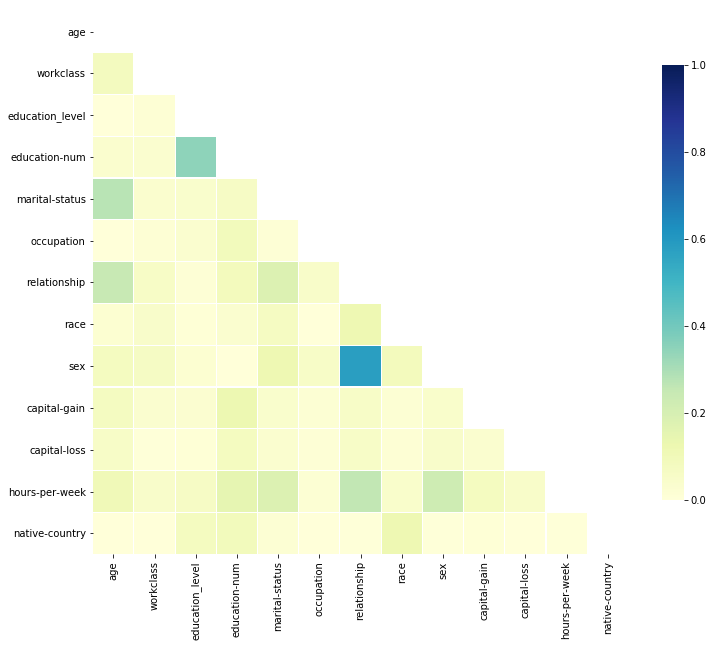

In [167]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(data.drop(['income'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

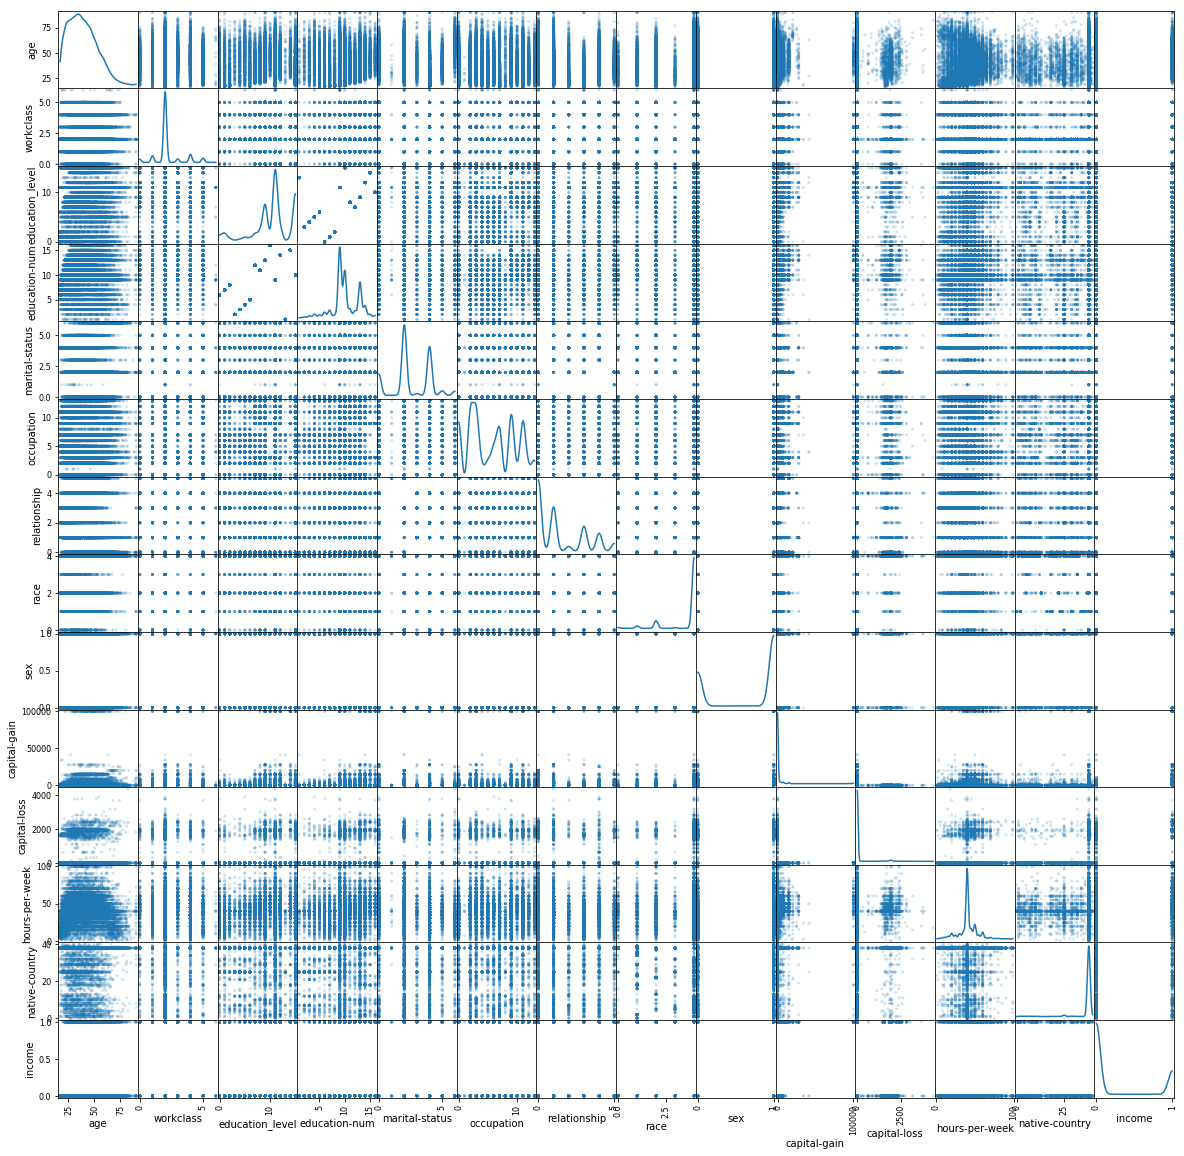

In [169]:
pd.plotting.scatter_matrix(data, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

# Creamos conjunto de test


In [172]:
from sklearn.model_selection import train_test_split

# preparamos los datos
features = data.columns.drop(['income'])
X = data[features].values
y = data['income'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, test_size = 0.2, random_state=0)

print('Datos train: ', X_train.shape)
print('Datos test:  ', X_test.shape)

Datos train:  (28941, 13)
Datos test:   (7236, 13)


# 2. Elección de algoritmo de ML
Una vez tenemos los conjuntos de Train y Test, voy a ir probando distintos algoritmos para ver como se comportan con nuestros datos.

Para ello, el procedimiento va a ser el siguiente:
- Elegimos un modelo.
- Alimentamos un GridSearch con el modelo y los datos, asi como el parametro libre sobre el que queremos realizar la optimización.
- Representamos la evolución de ese parametro libre en el GridSearch para encontrar el que resulta más optimo. Si podemos optimizar el modelo, estos calculos se pueden realizar en la misma celda o en la siguientes, según sea necesario visualizar mejor el resultado o el tiempo de computacion.
- Los resultados del modelo, así como los parametros libres elegidos se almacenan en un dataframe `resultadosModelo` que nos permitirán realizar la eleccion del modelo al final.



In [173]:
columns = ['Modelo', 'parametros-optimos', 'train', 'test']

resultadosModelo = pd.DataFrame(columns=columns)

def add_row(df, row):
    df.loc[-1] = row
    df.index = df.index + 1  
    return df.sort_index()




## 2.1 K-vecinos

In [174]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [175]:
# Parametro libre
nVecinos = np.arange(1, 16, 1)

In [176]:
param_grid = {'n_neighbors':  nVecinos}

grid = GridSearchCV(KNeighborsClassifier(), scoring= 'accuracy', param_grid=param_grid, cv = 5).fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.842
best parameters: {'n_neighbors': 6}


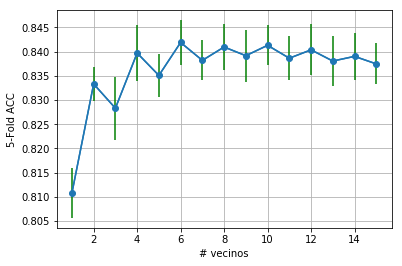

In [177]:
scores = np.array(grid.cv_results_['mean_test_score'])
stdvalues = np.array(grid.cv_results_['std_test_score'])
plt.plot(nVecinos,scores,'-o')
plt.errorbar(nVecinos, scores, yerr=stdvalues, ecolor='g')
plt.xlabel('# vecinos')
plt.ylabel('5-Fold ACC')
plt.grid()
plt.show()

In [178]:
vecinosOptimos = grid.best_params_['n_neighbors']
vecinosModel = KNeighborsClassifier(n_neighbors=vecinosOptimos).fit(X_train,y_train)

resTrain = vecinosModel.score(X_train,y_train)
resTest  = vecinosModel.score(X_test,y_test)

resultado = ['K-Vecinos', grid.best_params_, resTrain, resTest ]

add_row(resultadosModelo, resultado)

print("K-Vecinos")
print("Train: ", resTrain)
print("Test: ", resTest)

K-Vecinos
Train:  0.8789951971251857
Test:  0.8388612493090105


## 2.2 Regresión Lógistica

In [179]:
from sklearn.linear_model import LogisticRegression

In [180]:
# Parametro libre
vectorC = np.logspace(-10, 20, 200)

In [181]:
param_grid = {'C': vectorC}

grid = GridSearchCV(LogisticRegression(fit_intercept=False), scoring= 'accuracy', param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.2f}".format(grid.score(X_test, y_test)))


best mean cross-validation score: 0.802
best parameters: {'C': 3.4092850697467936e+16}
test-set score: 0.81


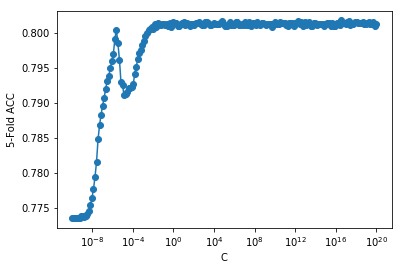

In [182]:
scores = np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(vectorC,scores,'-o')
plt.xlabel('C')
plt.ylabel('5-Fold ACC')
plt.show()

Aunque el algoritmo nos da un valor muy alto de C, podemos ver como a partir de 1e-2 se estabiliza. Volvemos a realizar el GridSearch en esos valores, para no elegir un valor de C que nos haga incurrir en overfitting.

En los comentarios estan las iteraciones que hemos realizado hasta encontrar un valor correcto.


best mean cross-validation score: 0.802
best parameters: {'C': 0.18420699693267145}
test-set score: 0.81


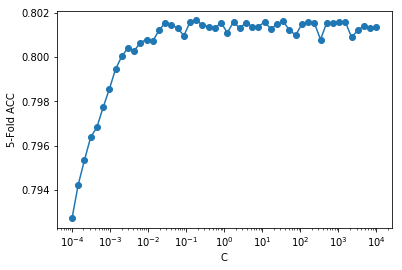

In [183]:
# Iteración  (haciendo zoom entre 1e-4 y 1e4)
# Iteración entre 1e-2 y 1e0

vectorC = np.logspace(-4, 4, 50)
param_grid = {'C': vectorC}

grid = GridSearchCV(LogisticRegression(fit_intercept=False), scoring= 'accuracy', param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.2f}".format(grid.score(X_test, y_test)))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(vectorC,scores,'-o')
plt.xlabel('C')
plt.ylabel('5-Fold ACC')
plt.show()


Pese a que el GridSearch nos da un valor concreto, En la zona entre 1e-2 y 1e-0 cualquier valor tiene un valor optimo pues vemos que a partir de este momento las variaciones en la `accuracy` son más ruido que otra cosa.
Para evitar overfitting elegimos un valor bajo de C


In [184]:
C = 0.1

logisticModel = LogisticRegression(C=C).fit(X_train,y_train)

resTrain = logisticModel.score(X_train,y_train)
resTest  = logisticModel.score(X_test,y_test)

resultado = ['Logistic', {'C':C}, resTrain, resTest ]

add_row(resultadosModelo, resultado)

print("Logistic")
print("Train: ", resTrain)
print("Test: ", resTest)

Logistic
Train:  0.8173525448325905
Test:  0.8195135433941404


In [185]:
resultadosModelo

,Modelo,parametros-optimos,train,test
1,K-Vecinos,{'n_neighbors': 6},0.878995,0.838861
0,Logistic,{'C': 0.1},0.817353,0.819514


## 2.3 Arboles de Decisión

best mean cross-validation score: 0.853
best parameters: {'max_depth': 8}


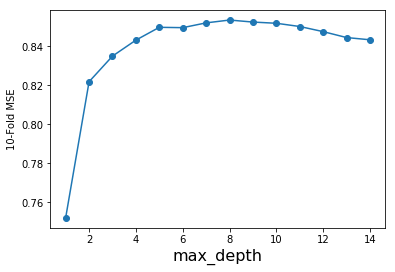

In [200]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

maxDepth = range(1,15)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv = 10)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

In [188]:
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeClassifier(max_depth=maxDepthOptimo-2).fit(X_train,y_train)

resTrain = treeModel.score(X_train,y_train)
resTest  = treeModel.score(X_test,y_test)

resultado = ['Tree Model', grid.best_params_, resTrain, resTest ]

add_row(resultadosModelo, resultado)

print("Arbol normal")
print("Train: ",resTrain)
print("Test: ",resTest)

Arbol normal
Train:  0.8531149580180367
Test:  0.8507462686567164


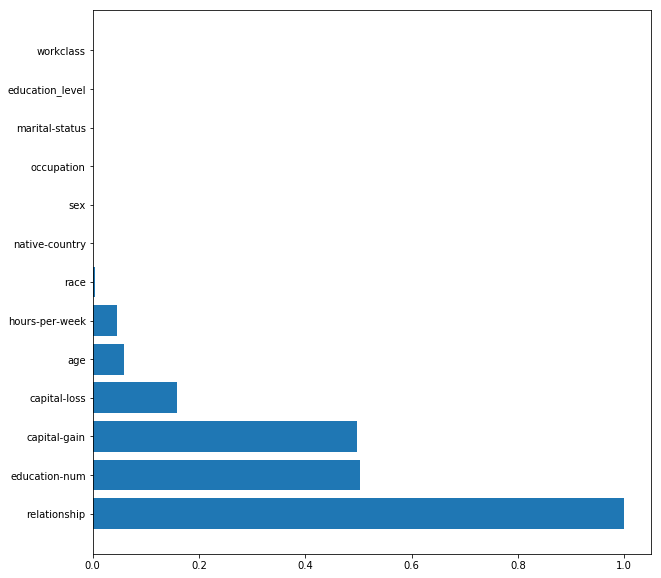

In [190]:
importances = treeModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),features[indices])
plt.show()

## Random Forest

best mean cross-validation score: 0.861
best parameters: {'max_depth': 17}


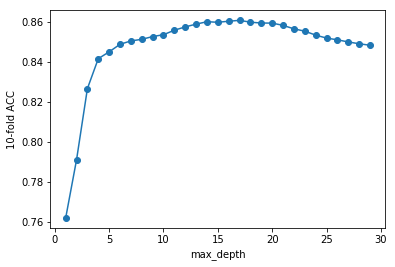

In [191]:
from sklearn.ensemble import RandomForestClassifier

# grid search
maxDepth = range(1,30)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestClassifier(random_state=0, 
                                           n_estimators=200, 
                                           max_features='sqrt'), 
                                           param_grid=tuned_parameters,cv=10) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [198]:
maxDepthOptimo = grid.best_params_['max_depth']

randomForestModel = RandomForestClassifier(max_depth=maxDepthOptimo).fit(X_train,y_train)

resTrain = randomForestModel.score(X_train,y_train)
resTest  = randomForestModel.score(X_test,y_test)

resultado = ['RandomForest', grid.best_params_, resTrain, resTest ]

add_row(resultadosModelo, resultado)

print("Random Forest")
print("Train: ",resTrain)
print("Test: ",resTest)

Random Forest
Train:  0.9096437579903942
Test:  0.8576561636263129


In [ ]:
#REVISAR

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

Niterations = [25,50,75,100,125,150,175,200,300]
learningRate = [0.5,0.1,0.05,0.01,0.005]
max_depth = [2,3,4,5]
# mantenemos max_depth estático: max_depth=2

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate, 'max_depth':max_depth}
grid = GridSearchCV(GradientBoostingClassifier(random_state=0), param_grid=param_grid, cv = 3)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))



best mean cross-validation score: 0.869
best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


## 2.6 Boosted Tree

Hacemos un arbol sencillo para saber cual es la profundidad optima

best mean cross-validation score: 0.850
best parameters: {'max_depth': 7}


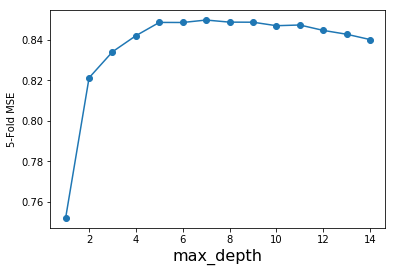

In [199]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# tu código aquí
maxDepth = range(1,15)
param_grid = {'max_depth': maxDepth}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv = 3)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

Con esta profundidad entrenamos el modelo para distintas iteraciones y tasas de aprendizaje

In [201]:
from sklearn.ensemble import GradientBoostingClassifier

Niterations = [25,50,75,100,125,150,175,200,300]
learningRate = [0.5,0.1,0.05,0.01]
#max_depth = [5,6,7,8,9]
max_depth = [7]

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate, 'max_depth': max_depth}
grid = GridSearchCV(GradientBoostingClassifier(random_state=0, max_depth=2), param_grid=param_grid, cv = 3)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.867
best parameters: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 175}


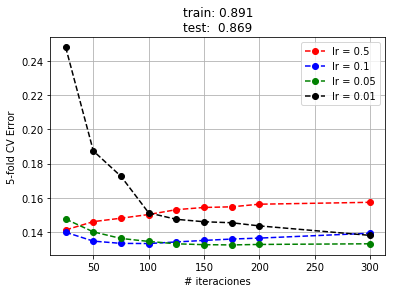

In [202]:
# calculamos métricas globales

max_depth = grid.best_params_['max_depth']
learning_rate = grid.best_params_['learning_rate']
n_estimators = grid.best_params_['n_estimators']

bt = GradientBoostingClassifier(random_state=0, max_depth=max_depth,learning_rate = learning_rate, 
                                n_estimators= n_estimators)
bt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

## 2.9 SVM


In [ ]:
from sklearn.svm import SVC

# Paso 2: Búsqueda de parámtros libres
vectorC = np.logspace(-1, 3, 20)
vectorG = np.logspace(-9, -1, 20)

param_grid = {'C': vectorC, 'gamma':vectorG}

grid = GridSearchCV(SVC(kernel='rbf'), scoring = 'accuracy', param_grid = param_grid, cv = 3)
grid.fit(X_train, y_train)
######

In [ ]:
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

# Mostramos prestaciones en CV
scores = grid.cv_results_['mean_test_score'].reshape(len(vectorC),len(vectorG))

plt.figure(figsize=(10,6))
plt.imshow(scores, interpolation='nearest', vmin= 0.6, vmax=0.8)
plt.xlabel('log(gamma)')
plt.ylabel('log(C)')
plt.colorbar()
plt.xticks(np.arange(len(vectorG)), np.log10(vectorG), rotation=90)
plt.yticks(np.arange(len(vectorC)), np.log10(vectorC))
plt.title('5-fold accuracy')
plt.show()

In [193]:
resultadosModelo

,Modelo,parametros-optimos,train,test
3,K-Vecinos,{'n_neighbors': 6},0.878995,0.838861
2,Logistic,{'C': 0.1},0.817353,0.819514
1,Tree Model,{'max_depth': 8},0.853115,0.850746
0,Tree Model,{'max_depth': 17},0.897343,0.858485


No handles with labels found to put in legend.


NameError: name 'bt' is not defined

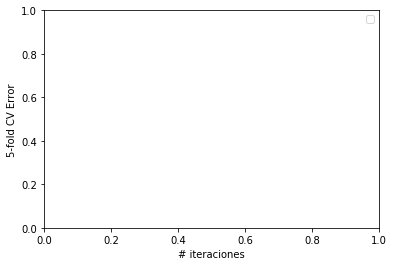

In [65]:
plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()